In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('train_outlier.csv')
df = data.copy()
print(df.shape)
print(df.dtypes)
df.head()

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title           object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


## Visualization

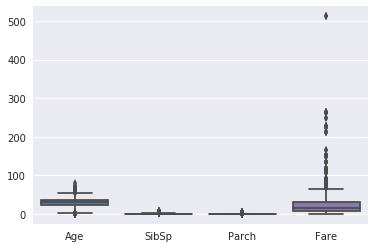

In [9]:
sns.boxplot(data=df.drop(['PassengerId', 'Survived', 'Pclass'], axis=1));

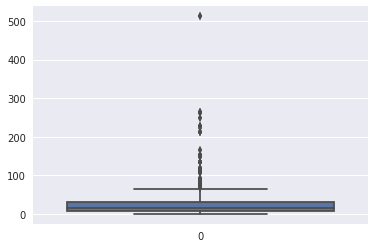

In [10]:
sns.boxplot(data=df['Fare']);

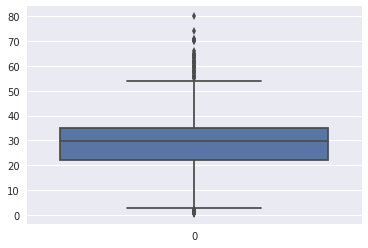

In [14]:
sns.boxplot(data=df['Age']);

## Outlier Detection using 1.5 IQR method

If a point falls outside `(Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)`, it's an outlier.

In [35]:
np.percentile(df['Fare'], [25, 75])

array([  7.9104,  31.    ])

In [25]:
q1, q3 = df['Fare'].quantile([0.25, 0.75]).values
iqr = q3 - q1
e1 = (q1 - (1.5*iqr))
e2 = (q3 + (1.5*iqr))

In [26]:
e1, e2

(-26.724, 65.634399999999999)

In [30]:
df[df['Fare'] < e1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title


In [29]:
df[df['Fare'] > e2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C,Mrs
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C,Mr
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C,Mrs
61,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.0000,C,Miss
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.000000,1,0,36973,83.4750,S,Mr
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.000000,0,0,S.O.C. 14879,73.5000,S,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S,Miss
102,103,0,1,"White, Mr. Richard Frasar",male,21.000000,0,1,35281,77.2875,S,Mr


In [32]:
df[(df['Fare'] < e1) | (df['Fare'] > e2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C,Mrs
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C,Mr
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C,Mrs
61,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.0000,C,Miss
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.000000,1,0,36973,83.4750,S,Mr
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.000000,0,0,S.O.C. 14879,73.5000,S,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S,Miss
102,103,0,1,"White, Mr. Richard Frasar",male,21.000000,0,1,35281,77.2875,S,Mr


## Using 3 Standad Deviation Rule

In [40]:
mean, sd = df['Fare'].mean(), df['Fare'].std()
_e1 = (mean - (3*sd))
_e2 = (mean + (3*sd))
_e1, _e2

(-116.87607782296804, 181.2844937601173)

In [41]:
df[df['Fare'] < _e1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title


In [43]:
df[df['Fare'] > _e2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S,Miss
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C,Mr
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C,Miss
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C,Mrs
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C,Miss
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S,Miss
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C,Mr
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C,Miss
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S,Mr


In [46]:
df[(df['Fare'] < _e1) | (df['Fare'] > _e2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S,Miss
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C,Mr
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C,Miss
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C,Mrs
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C,Miss
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S,Miss
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C,Mr
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C,Miss
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S,Mr
